In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Force TF to use only the CPU

In [2]:
from keras.preprocessing.text import Tokenizer
from keras.datasets import imdb
from keras import preprocessing

from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding

from keras.layers import LSTM
from keras.layers import GRU

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 5000)

2022-12-06 22:30:01.415216: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
traindf = pd.read_csv('./train.csv')
testdf = pd.read_csv('./test.csv')

In [4]:
traindf

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [5]:
testdf

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


# data preprocessing: fillna()

ID                 False
Gender             False
Ever_Married        True
Age                False
Graduated           True
Profession          True
Work_Experience     True
Spending_Score     False
Family_Size         True
Var_1               True
Segmentation       False
dtype: bool


<AxesSubplot:>

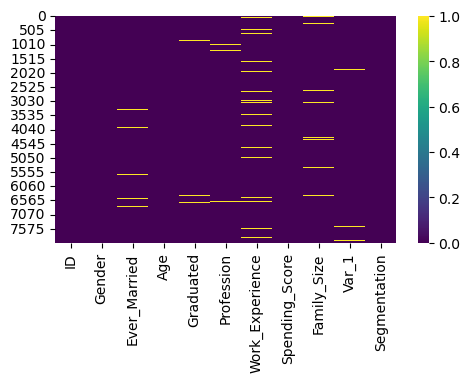

In [6]:
import seaborn as sns
print(traindf.isnull().any())
plt.figure(figsize=(traindf.shape[1] / 2, 3), dpi=100)
sns.heatmap(traindf.isnull(), cmap="viridis")

In [7]:
df = traindf
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1', 'Segmentation'], dtype='object')

In [8]:
df['Ever_Married'].describe()

count     7928
unique       2
top        Yes
freq      4643
Name: Ever_Married, dtype: object

In [9]:
df['Ever_Married'].fillna('Yes', inplace=True)

In [10]:
df['Graduated'].describe()

count     7990
unique       2
top        Yes
freq      4968
Name: Graduated, dtype: object

In [11]:
df['Graduated'].fillna('Yes', inplace=True)

In [12]:
df['Profession'].describe()

count       7944
unique         9
top       Artist
freq        2516
Name: Profession, dtype: object

In [13]:
df['Profession'].fillna('', inplace=True)

In [14]:
df['Work_Experience'].describe()

count    7239.000000
mean        2.641663
std         3.406763
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        14.000000
Name: Work_Experience, dtype: float64

In [15]:
df['Work_Experience'].fillna(df['Work_Experience'].mean(), inplace=True)

In [16]:
df['Spending_Score'].describe()

count     8068
unique       3
top        Low
freq      4878
Name: Spending_Score, dtype: object

In [17]:
df['Spending_Score'].fillna('Low', inplace=True)

In [18]:
df['Family_Size'].describe()

count    7733.000000
mean        2.850123
std         1.531413
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: Family_Size, dtype: float64

In [19]:
df['Family_Size'].fillna(df['Family_Size'].mean(), inplace=True)

In [20]:
df['Var_1'].describe()

count      7992
unique        7
top       Cat_6
freq       5238
Name: Var_1, dtype: object

In [21]:
df['Var_1'].fillna('Cat_6', inplace=True)

ID                 False
Gender             False
Ever_Married       False
Age                False
Graduated          False
Profession         False
Work_Experience    False
Spending_Score     False
Family_Size        False
Var_1              False
Segmentation       False
dtype: bool


<AxesSubplot:>

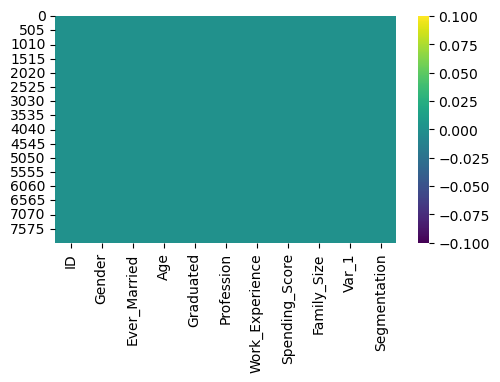

In [22]:
traindf = df
print(traindf.isnull().any())
plt.figure(figsize=(traindf.shape[1] / 2, 3), dpi=100)
sns.heatmap(traindf.isnull(), cmap="viridis")

ID                 False
Gender             False
Ever_Married        True
Age                False
Graduated           True
Profession          True
Work_Experience     True
Spending_Score     False
Family_Size         True
Var_1               True
dtype: bool


<AxesSubplot:>

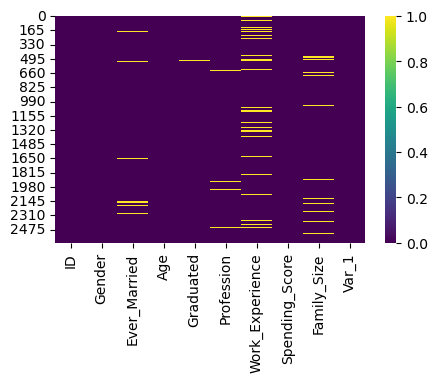

In [23]:
print(testdf.isnull().any())
plt.figure(figsize=(testdf.shape[1] / 2, 3), dpi=100)
sns.heatmap(testdf.isnull(), cmap="viridis")

ID                 False
Gender             False
Ever_Married       False
Age                False
Graduated          False
Profession         False
Work_Experience    False
Spending_Score     False
Family_Size        False
Var_1              False
Segmentation       False
dtype: bool


<AxesSubplot:>

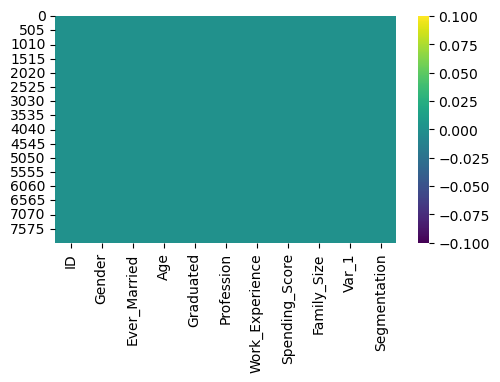

In [24]:
testdf['Ever_Married'].fillna('Yes', inplace=True)
testdf['Graduated'].fillna('Yes', inplace=True)
testdf['Profession'].fillna('', inplace=True)
testdf['Work_Experience'].fillna(testdf['Work_Experience'].mean(), inplace=True)
testdf['Spending_Score'].fillna('Low', inplace=True)
testdf['Family_Size'].fillna(testdf['Family_Size'].mean(), inplace=True)

print(traindf.isnull().any())
plt.figure(figsize=(traindf.shape[1] / 2, 3), dpi=100)
sns.heatmap(traindf.isnull(), cmap="viridis")

In [100]:
traindfx = traindf.drop(['Var_1', 'Segmentation'], axis=1)
traindfy = traindf['Var_1']
traindfx.shape

(8068, 9)

In [104]:
from sklearn.preprocessing import LabelEncoder
traindfy = LabelEncoder().fit_transform(traindfy)
traindfy.shape

(8068,)

In [102]:
X_test = testdf.drop(['Var_1'], axis=1)
y_test = testdf['Var_1']
X_test.shape

(2627, 9)

In [105]:
from sklearn.preprocessing import LabelEncoder
y_test = LabelEncoder().fit_transform(y_test)
y_test.shape

(2627,)

# data encoding

In [110]:
import category_encoders as ce
from sklearn.preprocessing import *
def onehot_encoding(x_train, x_test):
    categorical_data = [var for var in x_train.columns if x_train[var].dtype == 'O']

    encoder = ce.OneHotEncoder(cols=categorical_data)
    x_train = encoder.fit_transform(x_train)
    x_test = encoder.transform(x_test)

    scaler = RobustScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    return x_train, x_test

traindfx, X_test = onehot_encoding(traindfx, X_test)
traindfx

array([[-0.14732985,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.57493857],
       [-0.18419007, -1.        ,  1.        , ...,  1.        ,
         0.        ,  0.07493857],
       [ 0.63117575, -1.        ,  1.        , ...,  0.        ,
         0.        , -0.92506143],
       ...,
       [ 0.42933274, -1.        ,  1.        , ...,  0.        ,
         0.        , -0.92506143],
       [ 0.84967248, -1.        ,  1.        , ...,  0.        ,
         0.        ,  0.57493857],
       [-0.35383591,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.07493857]])

In [107]:
# from tensorflow.keras.utils import to_categorical
# n_classes = np.unique(y_test)
# to_categorical(y_test, n_classes)

# 1.1 Shuffling of the data before training (2 points)

shuffling data with random_state=0

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = \
    train_test_split(traindfx, traindfy, test_size=0.2, random_state=0, stratify=traindfy)

In [113]:
X_train

array([[-0.12268236,  0.        ,  0.        , ...,  0.        ,
         1.        ,  1.07493857],
       [-0.39646941, -1.        ,  1.        , ...,  0.        ,
         1.        , -0.42506143],
       [ 0.10380815, -1.        ,  1.        , ...,  0.        ,
         0.        ,  2.57493857],
       ...,
       [ 0.05362496,  0.        ,  0.        , ...,  1.        ,
         0.        , -0.42506143],
       [ 0.13134229, -1.        ,  1.        , ...,  0.        ,
         0.        , -0.42506143],
       [ 0.18085933,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.07493857]])

In [114]:
y_train

array([5, 5, 3, ..., 3, 5, 1])

In [115]:
X_valid

array([[ 0.20150994, -1.        ,  1.        , ...,  1.        ,
         0.        ,  1.57493857],
       [ 0.47685134,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.07493857],
       [-0.52214944,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.57493857],
       ...,
       [-0.70356389, -1.        ,  1.        , ...,  0.        ,
         0.        , -0.92506143],
       [ 0.87942711,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.92506143],
       [-0.87587432, -1.        ,  1.        , ...,  1.        ,
         0.        , -0.42506143]])

In [116]:
y_valid

array([5, 5, 2, ..., 5, 5, 5])

# 1.2 Design and train a neural network model (e.g. you can use DNN network or if you want to use any other models it is also acceptable) (10 points)

In [170]:
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Dense(256, activation='ReLU'))
model.add(Dense(256, activation='ReLU'))
model.add(Dense(64, activation='ReLU'))
model.add(Dense(64, activation='ReLU'))
model.add(Dense(10, activation='softmax'))

from tensorflow.keras.optimizers import SGD
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.0001), metrics=['accuracy'])  # optimizer='rmsprop', 

model.fit(X_train, y_train, batch_size=200, epochs=50, verbose=0, validation_data=(X_valid, y_valid))  # , validation_data=(X_valid, y_valid)

model.evaluate(X_valid, y_valid)

51/51 [==============================] - 0s 1ms/step - loss: 18.4029 - accuracy: 0.3922


[18.402856826782227, 0.3921933174133301]

In [128]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                1536      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 2,186
Trainable params: 2,186
Non-trainable params: 0
_________________________________________________________________


51/51 [==============================] - 0s 733us/step - loss: 18.4029 - accuracy: 0.1258


[18.402894973754883, 0.12577447295188904]

In [ ]:
model1 = models.Sequential()

# two intermediate layers with 16 hiddent units each with relu activation functions (which zero out negative values)
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(16, activation='relu'))

# output layer with sigmoid activation function to output something that can be interpreted as probability
model1.add(layers.Dense(1, activation='sigmoid'))

# compile the model
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model1.fit(X_train, y_train, epochs=4, batch_size = 512) # train the model in mini-batches of 512 samples

In [ ]:

# summarize model
print(model1.summary())